# Pymaceuticals Inc.
---

### Data Analyst

Vidal Garcia Martinez

### Analysis

Clinical study highlights:

- Capomulin and Ramicane have better performance compared with the rest of the treatments 
- Capomulin treatment was associated to the highest mice population while Zoniferol was to the smallest
- As the chart shows, the correlation between mouse weight and average tumor volume is 0.84. This means that when the mouse weight increases so does the average tumor volume.
- The total population of mice was almost identical in terms of gender. With 125 males (51%) and 124 females (49%)
 

In [1]:
# Dependencies and Setup
%matplotlib notebook

import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_count = len(study_data_complete['Mouse ID'].value_counts())
mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = study_data_complete[study_data_complete.duplicated(subset=['Mouse ID','Timepoint'])]
duplicate_mice['Mouse ID'].unique()


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = study_data_complete[study_data_complete['Mouse ID']==duplicate_mice.iloc[0,0]]
duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data_clean = study_data_complete[study_data_complete['Mouse ID'] != duplicate_mice.iloc[0,0]]
study_data_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
mice = len(study_data_clean['Mouse ID'].value_counts())
mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_regimen_data=study_data_clean.groupby(['Drug Regimen'])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = drug_regimen_data['Tumor Volume (mm3)'].mean()
median = drug_regimen_data['Tumor Volume (mm3)'].median()
var = drug_regimen_data['Tumor Volume (mm3)'].var()
std = drug_regimen_data['Tumor Volume (mm3)'].std()
sem = drug_regimen_data['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
tumor_summary = pd.DataFrame({'Mean Tumor Volume': mean, 'Median Tumor Volume': median, 'Tumor Volume Variance': var, 'Tumor Volume Std. Dev.': std, 'Tumor Volume Std. Err.' : sem})
tumor_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
agg_tumor_summary = drug_regimen_data.agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
agg_tumor_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<IPython.core.display.Javascript object>


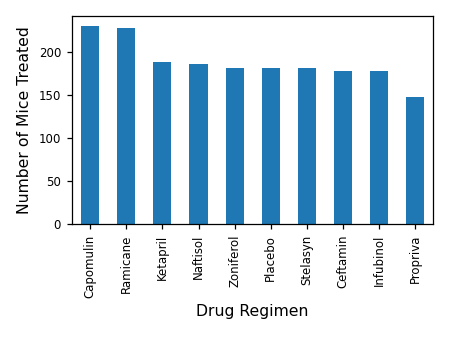

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints_by_regimen = pd.DataFrame(drug_regimen_data.count()["Timepoint"].sort_values(ascending=False))

ax = timepoints_by_regimen.plot(kind='bar',fontsize = 7.5, figsize=(4,3), 
                                xlabel='Drug Regimen', ylabel='Number of Mice Treated',legend=False)
plt.tight_layout()

<IPython.core.display.Javascript object>


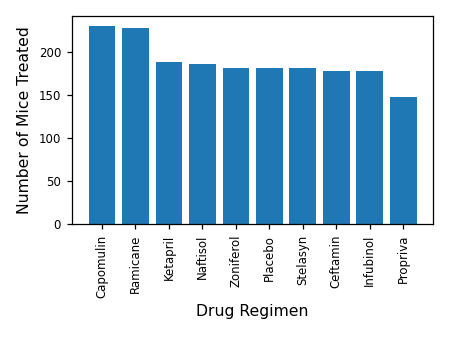

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot
timepoint_dict = timepoints_by_regimen.to_dict()

x = list(timepoint_dict.get('Timepoint', {}).keys())
height = list(timepoint_dict.get('Timepoint', {}).values())

plt.figure(figsize=(4,3))
plt.bar(x, height, width=0.8, align='center')
plt.xlabel("Drug Regimen", fontsize=10)
plt.ylabel("Number of Mice Treated", fontsize=10)
plt.xticks(fontsize=7.5,rotation=90)
plt.yticks(fontsize=7.5)
plt.tight_layout()

<IPython.core.display.Javascript object>


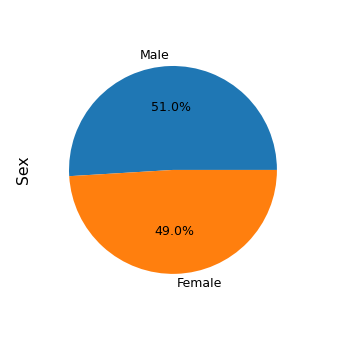

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_distro = pd.DataFrame(study_data_clean["Sex"].value_counts())
ax = sex_distro.plot(kind='pie', subplots=True, fontsize = 8, figsize=(3,3), legend=False, autopct= "%1.1f%%")

<IPython.core.display.Javascript object>


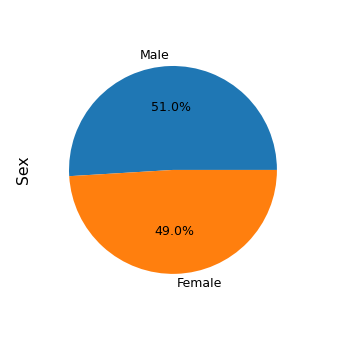

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_dict = sex_distro.to_dict()

labels = list(sex_dict.get('Sex', {}).keys())
sizes = list(sex_dict.get('Sex', {}).values())

plt.figure(figsize=(3,3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',textprops = {'fontsize':8})
plt.ylabel('Sex', fontsize=10)
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin = study_data_clean.loc[study_data_clean["Drug Regimen"] == "Capomulin",:]
ramicane = study_data_clean.loc[study_data_clean["Drug Regimen"] == "Ramicane", :]
infubinol = study_data_clean.loc[study_data_clean["Drug Regimen"] == "Infubinol", :]
ceftamin = study_data_clean.loc[study_data_clean["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
capomulin_tumor_volume = pd.DataFrame(capomulin.groupby('Mouse ID').max()['Timepoint'])
ramicane_tumor_volume = pd.DataFrame(ramicane.groupby('Mouse ID').max()['Timepoint'])
infubinol_tumor_volume = pd.DataFrame(infubinol.groupby('Mouse ID').max()['Timepoint'])
ceftamin_tumor_volume = pd.DataFrame(ceftamin.groupby('Mouse ID').max()['Timepoint'])

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
cap_group = pd.merge(capomulin_tumor_volume, study_data_clean, on=("Mouse ID","Timepoint"),how="left")
ram_group = pd.merge(ramicane_tumor_volume, study_data_clean, on=("Mouse ID","Timepoint"),how="left")
inf_group = pd.merge(infubinol_tumor_volume, study_data_clean, on=("Mouse ID","Timepoint"),how="left")
cef_group = pd.merge(ceftamin_tumor_volume, study_data_clean, on=("Mouse ID","Timepoint"),how="left")

<IPython.core.display.Javascript object>


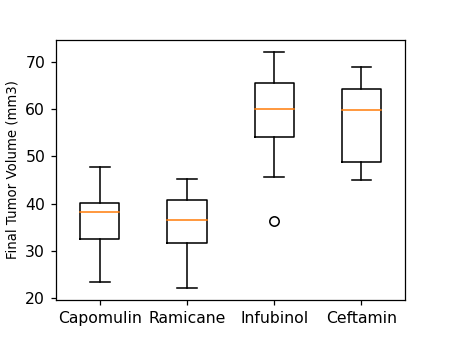

In [18]:
# Put treatments into a list for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
treatments = study_data_clean[study_data_clean["Drug Regimen"].isin(treatment_list)]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]

# Locate the rows which contain mice on each drug and get the tumor volumes
max_timepoint = treatments.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1])) 

# add subset 
max_timepoint = max_timepoint.stack(level=0).unstack(level=0)

treatment_idx = 0


for treatment in treatment_list:
    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = max_timepoint[treatment].quantile([.25,.5,.75]).round(2)
    lower_quar = quartiles[0.25].round(2)
    upper_quar = quartiles[0.75].round(2)
    iquar = round(upper_quar-lower_quar,2)
    # Determine outliers using upper and lower bounds
    lower_bound = round(lower_quar - (1.5*iquar),2)
    upper_bound = round(upper_quar + (1.5*iquar),2)
    
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
for treatment in treatment_list:
    tumor_vol_data.append(list(max_timepoint[treatment].dropna()))
    
plt.figure(figsize=(4,3))
plt.ylabel("Final Tumor Volume (mm3)", fontsize=8.5)
plt.boxplot(tumor_vol_data,labels=treatment_list)
plt.show()

## Line and Scatter Plots

<IPython.core.display.Javascript object>


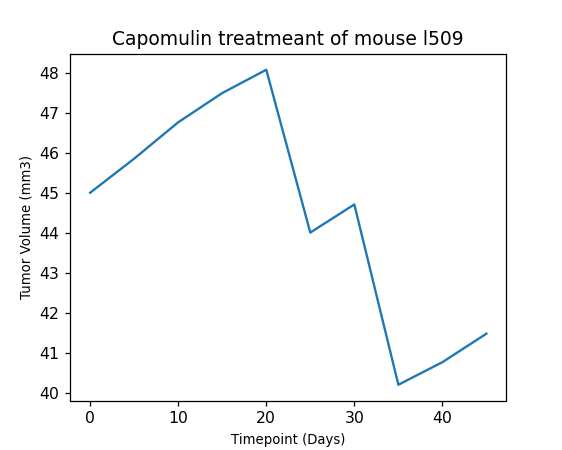

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x = capomulin.loc[capomulin["Mouse ID"] == "l509",:]["Timepoint"]
y = capomulin.loc[capomulin["Mouse ID"] == "l509",:]["Tumor Volume (mm3)"]

plt.figure(figsize=(5,4))
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x, y)
plt.xlabel('Timepoint (Days)', fontsize=8.5)
plt.ylabel('Tumor Volume (mm3)', fontsize=8.5)
plt.show()

<IPython.core.display.Javascript object>


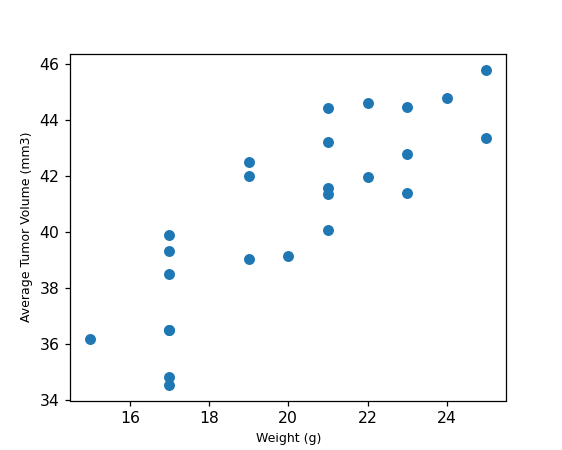

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_tumor_volume_cap =capomulin.groupby(['Mouse ID']).mean()

plt.figure(figsize=(5,4))
plt.scatter(avg_tumor_volume_cap['Weight (g)'],avg_tumor_volume_cap['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)',fontsize =8)
plt.ylabel('Average Tumor Volume (mm3)',fontsize =8)
plt.show()


## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


<IPython.core.display.Javascript object>


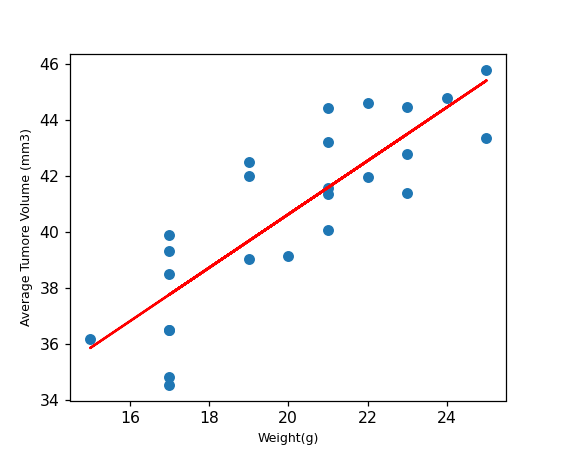

In [21]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation=round(st.pearsonr(avg_tumor_volume_cap['Weight (g)'],avg_tumor_volume_cap['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")

x = avg_tumor_volume_cap['Weight (g)']
y = avg_tumor_volume_cap['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regression_values  = x * slope + intercept

plt.figure(figsize=(5,4))
plt.scatter(x,y)
plt.plot(x,regression_values,"r-")
plt.xlabel('Weight(g)',fontsize =8)
plt.ylabel('Average Tumore Volume (mm3)',fontsize =8)
plt.show()
